# Test the ENC-DEC model

In [1]:
import dataloader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import models
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import os
import time
from torch_geometric.nn import GATv2Conv, global_mean_pool
# reload library
import importlib
import cv2
import utils as ut
import pandas as pd
import DataDLC

In [2]:
importlib.reload(dataloader)
importlib.reload(DataDLC)
importlib.reload(models)

<module 'models' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\models.py'>

## Load dataset

**Obs:** This is just a test to see if the model is working.

In [6]:
importlib.reload(dataloader)
importlib.reload(DataDLC)

<module 'DataDLC' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\DataDLC.py'>

In [7]:

dataloader.reload_module()

In [8]:
# deactivate warnings

import warnings
warnings.filterwarnings("ignore")


data_loader = dataloader.DLCDataLoader(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models', batch_size=1, num_workers=0, device='cpu', window_size=5, stride = 1, build_graph=True)


['DMD_mal_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_21

100%|██████████| 2628/2628 [02:51<00:00, 15.33it/s]


Loading file MDXCV_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2620/2620 [02:37<00:00, 16.66it/s]


Loading file DMD_mal_Test_2DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2633/2633 [02:43<00:00, 16.12it/s]


Loading file MDXCV_mal_Test_2DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:55<00:00, 15.00it/s]


Loading file DMD_mal_Test_3DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2630/2630 [03:02<00:00, 14.41it/s]


Loading file MDXCV_mal_Test_3DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2625/2625 [03:07<00:00, 13.99it/s]


Loading file DMD_mal_Test_4DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2627/2627 [02:57<00:00, 14.80it/s]


Loading file MDXCV_mal_Test_4DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:53<00:00, 15.12it/s]


Loading file DMD_mal_Test_5DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:43<00:00, 16.08it/s]


Loading file MDXCV_mal_Test_5DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2630/2630 [02:46<00:00, 15.77it/s]


Loading file DMD_mal_Test_6DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2632/2632 [02:48<00:00, 15.61it/s]


Loading file MDXCV_mal_Test_6DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [02:33<00:00, 17.18it/s]


Loading file DMD_mal_Test_7DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2613/2613 [02:32<00:00, 17.10it/s]


Loading file MDXCV_mal_Test_7DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [02:33<00:00, 17.11it/s]


Loading file DMD_mal_Test_8DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2647/2647 [02:34<00:00, 17.13it/s]


Loading file MDXCV_mal_Test_8DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [02:33<00:00, 17.11it/s]


Loading file DMD_mal_Test_9DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:35<00:00, 16.87it/s]


Loading file MDXCV_mal_Test_9DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:32<00:00, 17.22it/s]


Loading file DMD_mal_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:32<00:00, 17.20it/s]


Loading file MDXCV_mal_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:38<00:00, 16.57it/s]


Loading file DMD_mal_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [02:38<00:00, 16.53it/s]


Loading file MDXCV_mal_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:38<00:00, 16.58it/s]


Loading file DMD_mal_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2630/2630 [02:38<00:00, 16.54it/s]


Loading file MDXCV_mal_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [02:39<00:00, 16.54it/s]


Loading file DMD_mal_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [02:38<00:00, 16.56it/s]


Loading file MDXCV_mal_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2635/2635 [02:38<00:00, 16.60it/s]


Loading file DMD_mal_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2619/2619 [02:39<00:00, 16.44it/s]


Loading file MDXCV_mal_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2618/2618 [02:38<00:00, 16.50it/s]


Loading file DMD_mal_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2641/2641 [02:39<00:00, 16.55it/s]


Loading file MDXCV_mal_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2616/2616 [02:39<00:00, 16.44it/s]


Loading file DMD_mal_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2645/2645 [02:39<00:00, 16.59it/s]


Loading file MDXCV_mal_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2614/2614 [02:37<00:00, 16.56it/s]


Loading file DMD_mal_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2632/2632 [02:37<00:00, 16.68it/s]


Loading file MDXCV_mal_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2624/2624 [02:37<00:00, 16.69it/s]


Loading file DMD_mal_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2621/2621 [02:42<00:00, 16.15it/s]


Loading file MDXCV_mal_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2610/2610 [02:41<00:00, 16.14it/s]


Loading file DMD_mal_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2650/2650 [02:45<00:00, 16.02it/s]


Loading file MDXCV_mal_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:37<00:00, 16.64it/s]


Loading file DMD_mal_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2624/2624 [02:37<00:00, 16.70it/s]


Loading file MDXCV_mal_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [02:41<00:00, 16.27it/s]


Loading file DMD_mal_Test_21DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2634/2634 [02:47<00:00, 15.75it/s]


Loading file MDXCV_mal_Test_21DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2623/2623 [02:48<00:00, 15.59it/s]


Loading file DMD_mal_Test_22DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:47<00:00, 15.74it/s]


Loading file MDXCV_mal_Test_22DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2614/2614 [02:41<00:00, 16.18it/s]


Loading file DMD_mal_Test_23DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2610/2610 [02:33<00:00, 16.95it/s]


Loading file MDXCV_mal_Test_23DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [02:33<00:00, 17.19it/s]


Loading file DMD_mal_Test_24DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2625/2625 [02:34<00:00, 17.03it/s]


Loading file MDXCV_mal_Test_24DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:48<00:00, 15.58it/s]


Loading file DMD_mal_Test_25DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2641/2641 [03:02<00:00, 14.51it/s]


Loading file MDXCV_mal_Test_25DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2643/2643 [02:51<00:00, 15.38it/s]


Loading file DMD_mal_Test_26DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [02:43<00:00, 16.03it/s]


Loading file MDXCV_mal_Test_26DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [02:50<00:00, 15.36it/s]


Loading file DMD_mal_Test_27DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:56<00:00, 14.85it/s]


Loading file MDXCV_mal_Test_27DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [02:47<00:00, 15.73it/s]


Loading file DMD_mal_Test_28DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2627/2627 [02:51<00:00, 15.33it/s]


Loading file DMD_mal_Test_29DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2624/2624 [02:49<00:00, 15.48it/s]


Loading file DMD_mal_Test_30DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2643/2643 [02:49<00:00, 15.61it/s]


Loading file DMD_mal_Test_31DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2635/2635 [02:55<00:00, 15.02it/s]


Loading file DMD_mal_Test_32DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2627/2627 [02:52<00:00, 15.19it/s]

Number of files: 59


In [11]:
data_loader.save_dataset(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models\dataset_w5.pt')

In [12]:
dataset = torch.load(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models\dataset_w5.pt')

In [29]:
dataset[0].x

tensor(0.)

In [18]:
# Class balance 
y = []
for i in range(len(dataset)):
    y.append(dataset[i].behaviour)

In [22]:
y[0][1]

0.0

In [23]:
contact = []

for i in range(len(y)):
    contact.append(y[i][1])
    

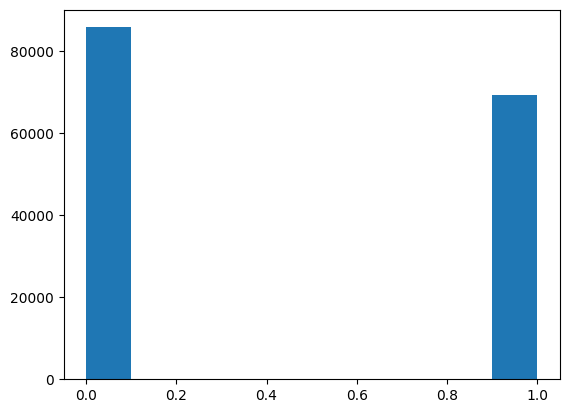

In [25]:
# Class balance 
plt.hist(contact)
plt.show()

---

# Create Graphs

This will take a while, and i dont even know if it is going to work. jejeje

In [ ]:
folder_path = 

### Graph Classifier

In [ ]:
graphencoder = models.GATEncoder(nout = 64, nhid=16, attention_hidden=2, n_in=3, dropout=0.5)
class_head = models.ClassificationHead(n_latent = 64, nhid=64, nout=2)

In [ ]:
model = models.GraphClassifier(graphencoder, class_head)

In [ ]:
out = model.forward(data_loader.dataset[0].x, data_loader.dataset[0].edge_index, data_loader.dataset[0].frame_mask)

In [ ]:
print(out.shape)

#### Trainning Loop

In [ ]:
# Trainning loop
epochs = 50
lr = 0.005
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
    model.train()
    for i, data in enumerate(data_loader):
        optimizer.zero_grad()
        x, edge_index, frame_mask, y = data.x, data.edge_index, data.frame_mask, data.y
        out = model.forward(x, edge_index, frame_mask)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch}, Batch {i}, Loss {loss.item()}')

In [ ]:
out = GraphAE.forward(data_loader.dataset[0].x, data_loader.dataset[0].edge_index, data_loader.dataset[0].frame_mask)

In [ ]:
# Loss and optimizer
loss = GraphAE.loss(data_loader.dataset[0].x, out)

In [ ]:
print(loss)

# Trainning loop

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
encoder = models.GATEncoder(nout = 64, nhid=16, attention_hidden=2, n_in=3, dropout=0.5).to(device)
print(encoder)
decoder = models.GATDecoder(n_latent=64, n_hidden=16, n_out=3).to(device)
print(decoder)
model = models.GraphAE(encoder, decoder).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)
data = data_loader.dataset

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    for i in range(len(data)):

        out = model(data[i].x.to(device), data[i].edge_index.to(device), data[i].frame_mask.to(device))
        loss = model.loss(data[i].x, out)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch}, Loss {loss.item()}')

model.eval()
out = model(data[0].x, data[0].edge_index, data[0].frame_mask)

In [ ]:
print(out[0][0].shape)

In [ ]:
numpyout = out[0][0].detach().numpy()

In [ ]:
# Plot the output of the model, the first dimension are the points, and the second one is the x and y coordinates
plt.scatter(numpyout[:,0], numpyout[:,1])


In [ ]:
print(data_loader.dataset[0].x.shape)
print(x[0].shape)
print(x[1].shape)

In [ ]:
print(data_loader.dataset[0].x.shape)
print(x[0].shape)
print(x[1].shape)

In [ ]:
contacts = behaviour.iloc[:,1]

---

---

---

---

---

---

---

#### eDIT NAMES

In [23]:
path = r'c:\Users\jalvarez\Documents\Data\DEEPLABCUT_needs_this_folder_I_dont_like_dlc'

# replace ' ' by '_'
for filename in os.listdir(path):
    os.rename(os.path.join(path, filename), os.path.join(path, filename.replace(' ', '_')))

---